<a href="https://colab.research.google.com/github/akurathikamal/Aco_News/blob/main/Earthquake_KNN_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is the detailed project description content:

## Earthquake Alert Prediction

This project aims to develop a machine learning model for predicting earthquake alert levels based on various seismic features. The primary objective is to classify the alert status (e.g., green, yellow, orange, red) to provide timely warnings and aid in disaster preparedness.

**Project Steps Completed:**
1.  **Data Loading:** The `earthquake-alert-prediction-dataset` was downloaded from Kaggle using `opendatasets` and loaded into a pandas DataFrame.
2.  **Initial Data Inspection:** We checked the first few rows, shape, and data types of the dataset.
3.  **Data Preprocessing:** The categorical 'alert' column was converted into numerical format using `LabelEncoder`.
4.  **Exploratory Data Analysis (EDA):**
    *   Histograms were generated to visualize the distribution of each feature.
    *   A correlation matrix was calculated and visualized using a heatmap to understand relationships between variables.
5.  **Data Splitting:** The dataset was divided into training and testing sets using `train_test_split`.
6.  **Model Training:** A K-Nearest Neighbors (KNN) classifier was initialized and trained on the training data.
7.  **Model Evaluation:** The model's performance was assessed using predictions on the test set, and metrics like classification report, confusion matrix, and accuracy score were calculated and displayed.
<img src="https://idsb.tmgrup.com.tr/ly/uploads/images/2023/03/07/261144.jpg" height="500px" width="900px"/>

In [8]:
import opendatasets as od

In [9]:
dataset=od.download("https://www.kaggle.com/datasets/ahmeduzaki/earthquake-alert-prediction-dataset")

Skipping, found downloaded files in "./earthquake-alert-prediction-dataset" (use force=True to force download)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("./earthquake-alert-prediction-dataset/earthquake_alert_balanced_dataset.csv")

In [11]:
df.head()

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


In [12]:
df.shape

(1300, 6)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["alert"]=le.fit_transform(df["alert"])

In [15]:
df.head()

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,0
1,6.9,25.0,4.0,4.0,-33.0,0
2,7.0,579.0,3.0,3.0,-13.0,0
3,7.3,37.0,5.0,5.0,65.0,0
4,6.6,624.0,0.0,2.0,-98.0,0


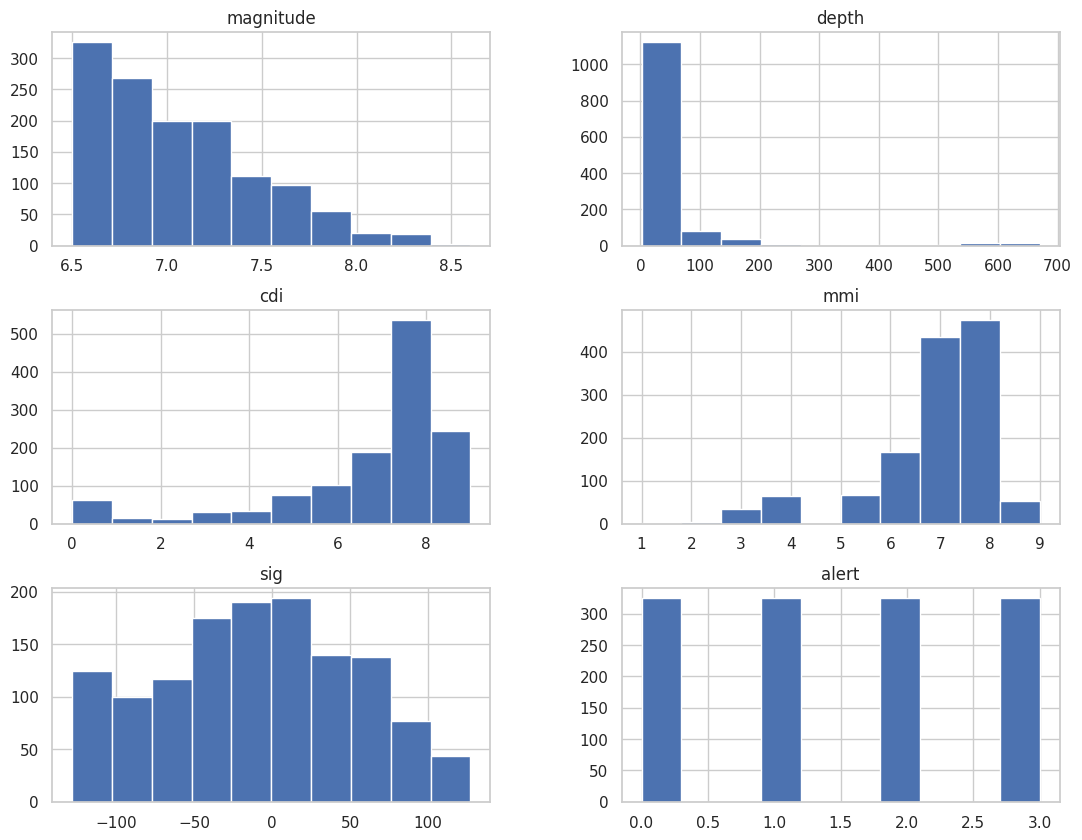

In [16]:
sns.set(style="whitegrid")
df.hist(figsize=(13,10))
plt.show()

In [17]:
df.corr()

,magnitude,depth,cdi,mmi,sig,alert
magnitude,1.000000,-0.015459,0.325690,0.302139,0.241131,0.229037
depth,-0.015459,1.000000,-0.367134,-0.566402,-0.099639,-0.251190
cdi,0.325690,-0.367134,1.000000,0.677894,0.387195,0.449327
mmi,0.302139,-0.566402,0.677894,1.000000,0.330218,0.452922
sig,0.241131,-0.099639,0.387195,0.330218,1.000000,0.130602
alert,0.229037,-0.251190,0.449327,0.452922,0.130602,1.000000


<Axes: >

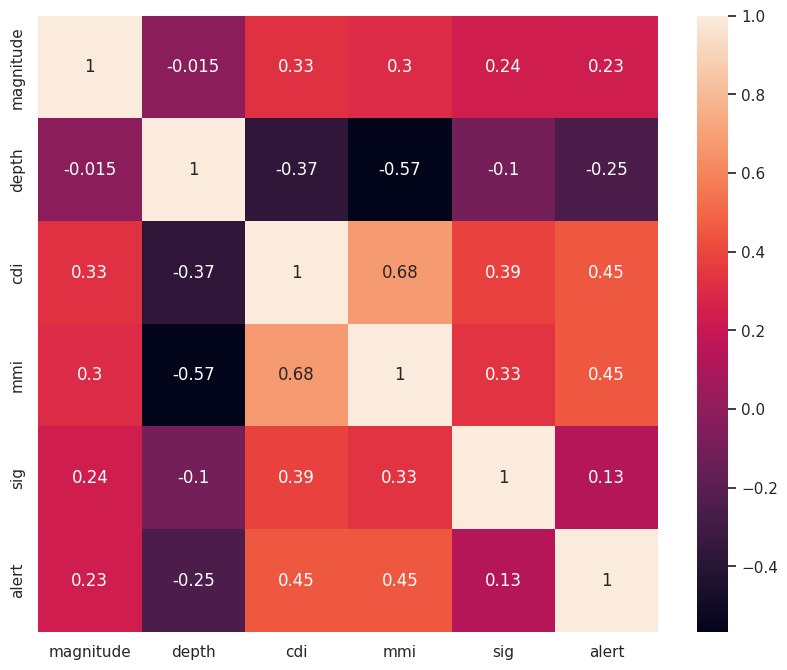

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [19]:
x=df.drop("alert",axis=1)
y=df["alert"]

In [20]:
x.head()

,magnitude,depth,cdi,mmi,sig
0,7.0,14.0,8.0,7.0,0.0
1,6.9,25.0,4.0,4.0,-33.0
2,7.0,579.0,3.0,3.0,-13.0
3,7.3,37.0,5.0,5.0,65.0
4,6.6,624.0,0.0,2.0,-98.0


In [21]:
y

,alert
0,0
1,0
2,0
3,0
4,0
...,...
1295,3
1296,3
1297,3
1298,3


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [23]:
X_train.head()

,magnitude,depth,cdi,mmi,sig
578,6.94,13.0,8.0,7.0,22.0
687,7.02,32.0,9.0,8.0,-88.0
811,6.87,16.0,8.0,8.0,-30.0
1268,8.12,34.0,8.0,7.0,-28.0
841,7.07,15.0,8.0,8.0,-9.0


In [24]:
Y_train.head()

,alert
578,1
687,1
811,2
1268,3
841,2


In [25]:
X_train.shape

(1040, 5)

In [26]:
Y_train.shape

(1040,)

In [27]:
X_test.shape

(260, 5)

In [28]:
Y_test.shape

(260,)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
Y_pred=KNN.predict(X_test)
Y_pred

array([1, 1, 1, 3, 2, 3, 0, 3, 0, 0, 3, 3, 0, 3, 1, 2, 3, 0, 0, 1, 3, 3,
       0, 1, 1, 1, 0, 1, 0, 2, 1, 3, 0, 1, 3, 1, 0, 2, 1, 1, 0, 3, 1, 3,
       2, 3, 1, 1, 0, 0, 2, 3, 3, 3, 3, 2, 0, 2, 0, 1, 2, 2, 3, 1, 1, 1,
       1, 1, 0, 1, 3, 1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 3, 2, 3,
       3, 2, 3, 3, 2, 0, 3, 1, 2, 3, 2, 2, 1, 0, 2, 0, 3, 1, 1, 1, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 3, 1, 3, 2, 0, 1, 0, 3, 0, 3,
       0, 1, 2, 1, 3, 3, 1, 1, 1, 0, 3, 3, 2, 1, 3, 1, 1, 2, 1, 3, 1, 2,
       3, 3, 0, 3, 2, 0, 1, 1, 3, 1, 3, 3, 0, 2, 3, 1, 2, 2, 0, 2, 2, 0,
       2, 0, 1, 2, 2, 3, 2, 3, 0, 3, 0, 0, 1, 1, 3, 2, 3, 3, 0, 3, 3, 3,
       1, 1, 0, 1, 0, 3, 0, 3, 3, 2, 3, 0, 2, 2, 1, 3, 2, 3, 2, 1, 0, 1,
       2, 1, 1, 1, 3, 2, 3, 0, 0, 3, 3, 0, 2, 1, 3, 2, 0, 1, 2, 0, 1, 0,
       1, 1, 1, 2, 2, 2, 3, 0, 0, 2, 3, 1, 2, 1, 3, 1, 1, 1])

In [31]:
Y_test

,alert
591,1
495,1
267,0
1276,3
730,2
...,...
475,1
176,3
592,1
683,1


In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62        56
           1       0.78      0.76      0.77        82
           2       0.83      0.88      0.85        56
           3       0.75      0.77      0.76        66

    accuracy                           0.75       260
   macro avg       0.75      0.75      0.75       260
weighted avg       0.75      0.75      0.75       260



In [33]:
confusion_matrix(Y_test,Y_pred)

array([[34,  8,  2, 12],
       [ 9, 62,  7,  4],
       [ 1,  5, 49,  1],
       [10,  4,  1, 51]])

<Axes: >

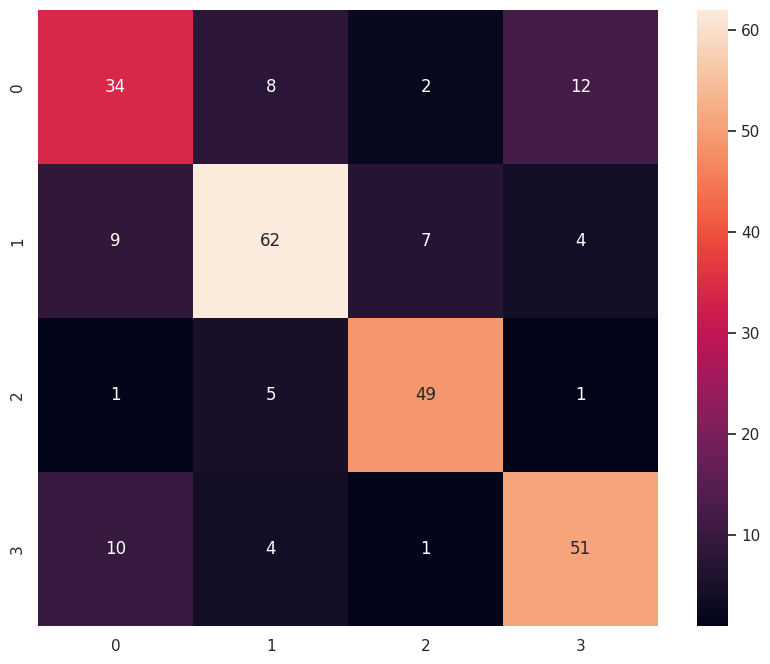

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)

In [35]:
print(accuracy_score(Y_test,Y_pred))

0.7538461538461538
